<a href="https://colab.research.google.com/github/BinaryCardinal/cs480student/blob/main/01/CS480_Assignment_1_Nana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

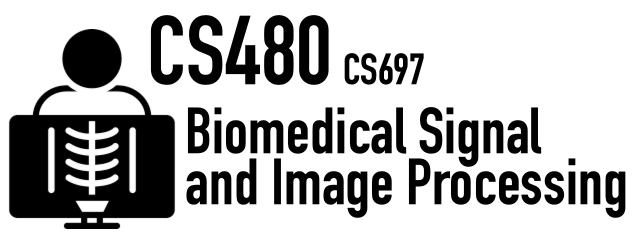
# Assignment 1


In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [7]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [8]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

In [38]:
# ECG from 9 to 11 seconds
ecg_from9to11seconds = ecg[SAMPLING_RATE*8:SAMPLING_RATE*10] 

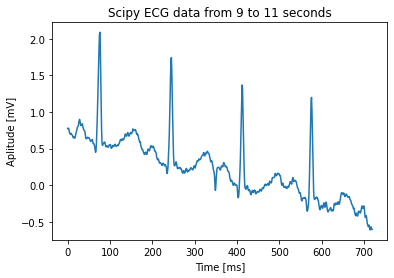

In [39]:
# show the data
plt.xlabel('Time [ms]')
plt.ylabel('Aplitude [mV]')
plt.title('Scipy ECG data from 9 to 11 seconds')
plt.plot(ecg_from9to11seconds)

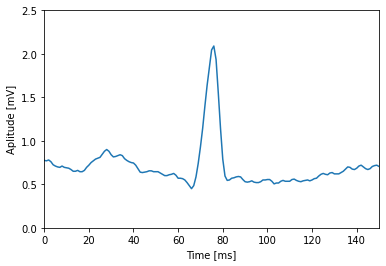

In [40]:
# show the first single wave in above diagram (not required)
plt.xlim(0,150)
plt.ylim(0,2.5)
plt.xlabel('Time [ms]')
plt.ylabel('Aplitude [mV]')
plt.plot(ecg_from9to11seconds)

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [12]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [13]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

In [41]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [15]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


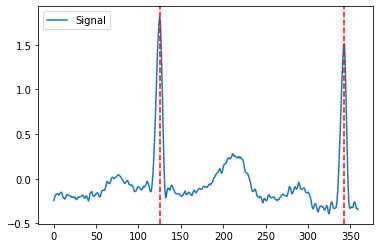

In [16]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [17]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

In [42]:
# use neurokit's function to detect the R spikes betweek 9 and 11 seconds
_, rpeaks_from9to11seconds = nk.ecg_peaks(ecg_from9to11seconds, sampling_rate=SAMPLING_RATE)
print(rpeaks_from9to11seconds['ECG_R_Peaks'])

[245 412 576]


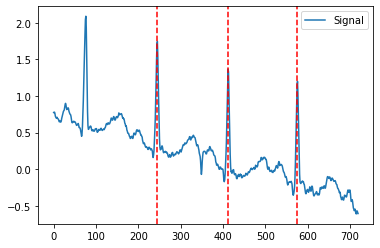

In [43]:
# plot the detected R spikes
plot = nk.events_plot(rpeaks_from9to11seconds['ECG_R_Peaks'], ecg_from9to11seconds)
# won't detect the first R spikes?

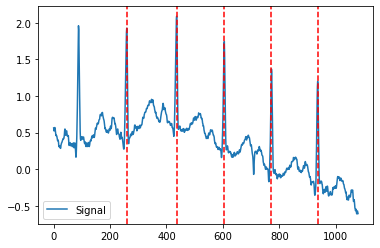

In [48]:
# extend the range by +- 1 second to see the five peaks from Task 1
ecg_from8to11seconds = ecg[SAMPLING_RATE*7:SAMPLING_RATE*10] 
_, rpeaks_from8to11seconds = nk.ecg_peaks(ecg_from8to11seconds, sampling_rate=SAMPLING_RATE)
plot = nk.events_plot(rpeaks_from8to11seconds['ECG_R_Peaks'], ecg_from8to11seconds)

**Task 3:** Detect Heartrate. [15 Points]

In [21]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [49]:
# Idea: normal R-R interval is 0.1-0.16s
# calculate R-R interval for all R peaks, print out the index that its R-R interval is between 0.1s and 0.16s.
arr = rpeaks['ECG_R_Peaks'] # store all rpeaks in an array arr
length = len(arr)
i = 1
while i < length:
    interval = (arr[i] - arr[i - 1]) / 1000
    if interval <= 0.16 and interval >= 0.1:
        print(i) # print index
    i += 1

19
26
102
108
175
251
263
489


In [24]:
# Answer: yes, the index 19, 26, 102, 108, 175, 251, 263, 489 have nomal heart rates.

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [25]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

In [ ]:
#Delineate the ECG signal from 9 to 11 seconds (not work here)
_, waves_peak = nk.ecg_delineate(ecg_from9to11seconds, rpeaks_from9to11seconds, sampling_rate=SAMPLING_RATE)
# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg_from9to11seconds)

In [ ]:
# Delineate the ECG signal from 9 to 11 seconds and visualizing all peaks of ECG complexes (not work here)
_, waves_peak = nk.ecg_delineate(ecg_from9to11seconds, rpeaks_from9to11seconds, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

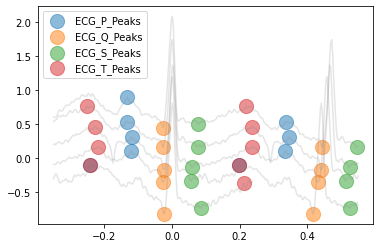

In [54]:
# Extend the range by +-100 can get good-looking but not correct delineation
ecg_new = ecg[SAMPLING_RATE*8-100:SAMPLING_RATE*10+100]
_,rpeaks_new = nk.ecg_peaks(ecg_new, sampling_rate= SAMPLING_RATE)
_, waves_peak = nk.ecg_delineate(ecg_new, rpeaks_new, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

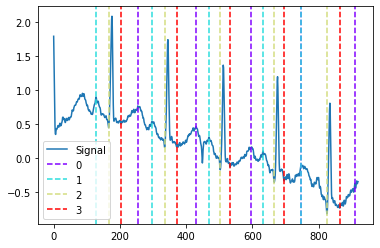

In [55]:
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg_new)

In [ ]:
# TODO Does the detection work well?

# No. It can't use nk.ecg_delineate to detect P Q S T waves in the range of 9 to 11 seconds directly. 
# It throws error message. "NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector."

# After extend the range by +-100, the delineation looks good. But the detection doesn't work well. It doesn't mark the peaks correctly.

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

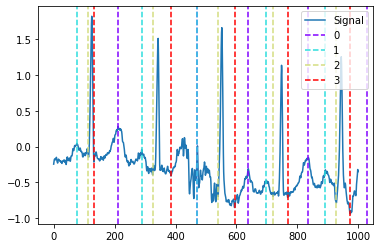

In [29]:
#Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg, rpeaks, sampling_rate=SAMPLING_RATE)
# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5],
                       waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5]], ecg[:1000])

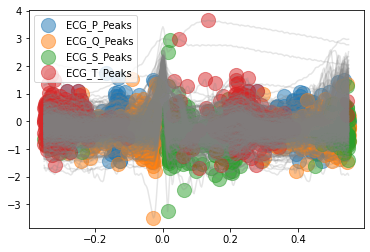

In [68]:
_, waves_peak = nk.ecg_delineate(ecg, rpeaks, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

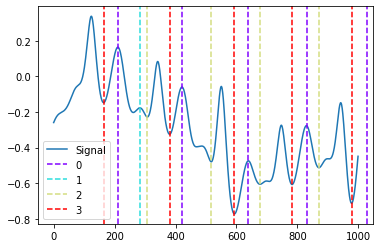

In [73]:
ecg_filtered = nk.signal_filter(ecg, lowcut=0, highcut=5, sampling_rate=SAMPLING_RATE)
#Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg_filtered, rpeaks, sampling_rate=SAMPLING_RATE)
# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5],
                       waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5]], ecg_filtered[:1000])

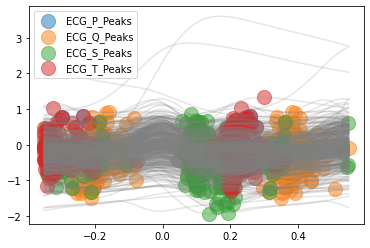

In [72]:
_, waves_peak = nk.ecg_delineate(ecg_filtered, rpeaks, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [ ]:
# TODO Does the filtering improve the result?

# Yes. The filtering improves the result. It can detect P Q S T Peaks more accuratly.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#